# NumPy/SciPy

[Numerical Python](http://www.numpy.org/) (`numpy`), [Scientific Python](http://www.scipy.org/) (`scipy`) are the two most popular packages for numerical manipulation and data analysis.

Along the way we will also introduce matplotlib, the most popular plotting package in python.  
It will be very familiar to matlab users (if the name didn't already give that away).

In [5]:
from __future__ import division

import numpy as np

## Arrays are what drive numpy
Arrays can contain different types of python elements (or multiple types).  
They also can have multiple shapes (dimensions)

In [4]:
a=np.arange(5); print(a)
print(a.dtype)
print(a.shape)

[0 1 2 3 4]
int64
(5,)


In [5]:
m = np.array([np.arange(2), np.arange(2)]);print(m)
print(m.shape)

[[0 1]
 [0 1]]
(2, 2)


Arrays can be sliced like lists

In [6]:
a = np.arange(9)
first_three = a[:3]
three_to_end = a[3:]
one_to_four = a[1:5]
last_three = a[-3:]
without_first_last = a[1:-1]
every_other = a[::2]
reverse_list = a[::-1]

But you can also slice multi-dimensional arrays intuitively!

In [7]:
a = np.array([[1,2,3],[4,5,6]])
row = a[0]
column = a[:, 0]
row2_col2 = a[1,1]
row23_col23 = a[1:3, 1:3]

Arrays can be reshaped easily

In [8]:
b = np.arange(24)
print(b)
b=b.reshape(2,3,4)#doesn't change b
print(b)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
[[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]]

 [[12 13 14 15]
  [16 17 18 19]
  [20 21 22 23]]]


In [9]:
b.shape=(6,4)#changes b
print(b)
b = b.T #b.transpose()
print(b)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]
 [20 21 22 23]]
[[ 0  4  8 12 16 20]
 [ 1  5  9 13 17 21]
 [ 2  6 10 14 18 22]
 [ 3  7 11 15 19 23]]


In [10]:
b = np.arange(24)
b.shape=(2,3,4);b

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

*What do the following slicing operations give you?  
Can you guess before you try them based on what you know about slicing lists and the shape of the array?*

In [11]:
b[0,0,0]
b[:,0,0]
b[0]
b[0,1]
b[0,1,::2]
b[:,:,1]
b[:,1]
b[0,:,1]
b[0,::-1,-1]
b[::-1]

array([[[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]],

       [[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]]])

You can also create special arrays very easily

In [12]:
b = np.ones([3,2])
print(b)

c = np.zeros((4,5))
print(c)

I = np.eye(3)
print(I)

[[ 1.  1.]
 [ 1.  1.]
 [ 1.  1.]]
[[ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]]
[[ 1.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]]


Unlike lists, arrays behave "properly" - that is, it's a little harder to run into a mathematical operation that doesn't just work as you may expect.

In [13]:
a = np.array([[1,2],[3,4]])

a + 1 #scalar addition

array([[2, 3],
       [4, 5]])

In [14]:
b = np.array([[1, 1], [2, 2]])

print(b + a) # elementwise addition
print(b * a) # element wise multiplication

[[2 3]
 [5 6]]
[[1 2]
 [6 8]]


In [15]:
# matrix multiplication
b.dot(a)

array([[ 4,  6],
       [ 8, 12]])

Naturally, additions or multiplications for arrays of different shapes do not work.

In [16]:
b = np.ones([3,2])

b + a

ValueError: operands could not be broadcast together with shapes (3,2) (2,2) 

In [17]:
a.dot(b)

ValueError: shapes (2,2) and (3,2) not aligned: 2 (dim 1) != 3 (dim 0)

### arange and linspace
[`arange`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.arange.html) is the floating-point counterpart to `range`.  `range` only returns integers and fails on floating-point arguments.  `arange` returns an array of evenly-spaced floating-point values.

**Python 2 v. 3**:  In Python 2, `range` generates a `list` of values.  In Python 3, `range` returns an iterable instead (equivalent to Python 2's `xrange`).  If you're not sure of the difference yet, the behavior should still be as you generally expect.

In [18]:
print('range with integers: ', [i for i in range(10)])
print('range with integers: ', [i for i in range(0,10,2)])
print('range with floats: ',   [i for i in range(0,10,0.5)])

range with integers:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
range with integers:  [0, 2, 4, 6, 8]


TypeError: 'float' object cannot be interpreted as an integer

In [19]:
print('arange with integers: ', np.arange(10))
print('arange with integers: ', np.arange(0,10,2))
print('arange with floats: ',   np.arange(0,10,0.5))

arange with integers:  [0 1 2 3 4 5 6 7 8 9]
arange with integers:  [0 2 4 6 8]
arange with floats:  [ 0.   0.5  1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5  6.   6.5  7.
  7.5  8.   8.5  9.   9.5]


Another option you have to create ranges is [`linspace`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html), which is familiar to MATLAB users.

In [20]:
# Create an array with 11 equal spaces from 0 to 1 inclusive.
np.linspace(0, 1, 11)

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ])

*Try the following:*  
- Create a $5\times5$ identity matrix.

- Create a range from -1.7 to 3.4 with 100 intervals using `linspace`.  Then do it using `arange`.

- Create an array `x` with the numbers $0, 0.5, 1.0$.
- Create an array `y` with the numbers $-5.3, -1.8, 1.5$.
- Place `x` and `y` into an array as two subsequent rows of data.  (We haven't talked about this yet—try a few things to see what works.)

### Copies
As with list, be careful when copying arrays

In [21]:
A = np.linspace(0.0, 9.0, 10)
B = A

print("A =", A)
B[0] = -1 #changes element in A since B is simply another name for A
print("A =", A)

A = [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9.]
A = [-1.  1.  2.  3.  4.  5.  6.  7.  8.  9.]


Unlike in lists [:] does not copy a list

In [22]:
A = np.linspace(0.0, 9.0, 10)
B = A[:]
print("A =", A)
B[0] = -1
print("A =", A)

A = [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9.]
A = [-1.  1.  2.  3.  4.  5.  6.  7.  8.  9.]


Instead a copy must be made

In [23]:
A = np.linspace(0.0, 9.0, 10)
B = A.copy()
print("A =", A)
B[0] = -1
print("A =", A)
print("B =", B)

A = [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9.]
A = [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9.]
B = [-1.  1.  2.  3.  4.  5.  6.  7.  8.  9.]


### Sorting

Sorting by a nested element in a list of lists is rather complicated, requiring the definition of a sorting function for `sorted`, for instance.  NumPy provides a trivial solution:

In [24]:
A = np.array([[1.5,0.9,4.6,0.1],[0.3,0.8,1.3, 2.7],[2.5,2.5,0.6,3.2]])

print('A = \n', A, '\n')

# np.sort sorts everything in its column or row.
print('Sorted along first index:\n', np.sort(A, 0), '\n')
print('Sorted along second index:\n', np.sort(A, 1), '\n')

A = 
 [[ 1.5  0.9  4.6  0.1]
 [ 0.3  0.8  1.3  2.7]
 [ 2.5  2.5  0.6  3.2]] 

Sorted along first index:
 [[ 0.3  0.8  0.6  0.1]
 [ 1.5  0.9  1.3  2.7]
 [ 2.5  2.5  4.6  3.2]] 

Sorted along second index:
 [[ 0.1  0.9  1.5  4.6]
 [ 0.3  0.8  1.3  2.7]
 [ 0.6  2.5  2.5  3.2]] 



Numpy has built in methods to interegate arrays

In [25]:
a = np.arange(9)
print("mean = {}".format(np.mean(a)))
print("Standard Deviation = {}".format(np.std(a)))
print("median = {}".format(np.median(a)))

mean = 4.0
Standard Deviation = 2.581988897471611
median = 4.0


*What is the mean and standard deviation of the matrix A from above?  
What is the mean and standard deviation of each row? And each column?*

## Importing Data

There are several packages that make working with files very easy.  
The first is "os" which lets you:
- listdir(directory) : list all files in a directory
- rename(original_name, new_name) : rename files
- remove(path) : delete files
- path.join(directory, file_name) : join file_name and directory

Try to search the "data" folder for all of the ".tif" files. 
Can you figure out how to pad the numbers and rename the files?

In [6]:
import os



Numpy can import data from delimited files (.txt, .dat, .csv)
NOTE: loadtxt does not play well with headers,
use the skiprow arguement to ignore the neccesary rows at the beginning of files

In [7]:
dat_data = np.loadtxt("Data/Rail_frame.dat", skiprows=3) #tab delimited (default) 
csv_data = np.loadtxt("Data/Rail_frame.csv", skiprows=3, delimiter=',') #comma delimited

You can also import select columns and/or immediately seperate columns and assign them each to a variable

In [8]:
disp, load = np.loadtxt("Data/Rail_frame.dat", skiprows=3, usecols=(1,2), unpack=True)

If you are using .csv files, a more powerful option is to use the Pandas package:  
Pandas creates a 2 Dimensional data structure called a `DataFrame`. The `DataFrame` object is similar to a table or a spreadsheet in Excel, i.e. a 2D Matrix-like object. 

In [9]:
import pandas as pd
data_frame = pd.read_csv('Data/Rail_frame.csv', skiprows=2) #Pandas will read in the column headers
data_frame[:10]

,Time (ms),Displacement (um),Load (N)
0,0,0,14.147181
1,51,1,13.982979
2,126,2,14.209734
3,226,3,13.930852
4,326,4,13.606357
5,426,5,13.910001
6,526,6,14.139362
7,626,7,14.268378
8,726,8,14.169336
9,826,9,14.049442


Data Frames can be thought of as a combination of numpy arrays and dictionaries/look up tables:  
You can manipulate them like arrays, but also call variables like dictionaries

In [10]:
data_frame['Load (N)'][0:10]

0    14.147181
1    13.982979
2    14.209734
3    13.930852
4    13.606357
5    13.910001
6    14.139362
7    14.268378
8    14.169336
9    14.049442
Name: Load (N), dtype: float64

Like dictionaries you can add columns w/ labels very easily

In [11]:
area = (0.3 *3)
lo = 25

data_frame['Strain (%)'] = data_frame['Displacement (um)']/lo * 100
data_frame['Stress (MPa)'] = data_frame['Load (N)']/area

You can import image files a data arrays using scipy.misc 

In [32]:
from scipy import misc
img_data = misc.imread()

TypeError: imread() missing 1 required positional argument: 'name'

## Plotting Data
The most popular data plotting package is [MatPlotLib](http://www.matplotlib.org/) (`matplotlib`) and is based off of MATLAB's plotting package.

In [12]:
import matplotlib as mpl
from matplotlib import pyplot as plt

#IPython magic command for inline plotting
%matplotlib inline
#a better plot shape
mpl.rcParams['figure.figsize']=[8,6]

Lets plot the load displacement data from the Rail Frame

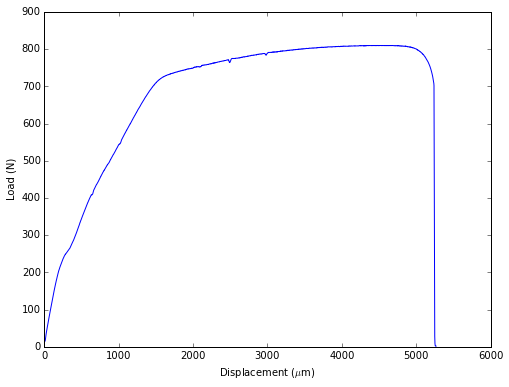

In [14]:
disp = data_frame['Displacement (um)']
load = data_frame['Load (N)']
plt.plot(disp, load, color='b', linestyle='-')
plt.xlabel(r'Displacement ($\mu$m)')
plt.ylabel('Load (N)')
plt.show()